 # Initial analysis

In [27]:
import math
import random
from datetime import datetime
import skimage.io as skd
import os
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def load_data(data_path):
    print('Analysis - Loading data from path [{}]'.format(data_path))
    dirs = [x for x in os.listdir(data_path)
            if os.path.isdir(os.path.join(data_path, x))]
    lab, im = [], []
    for d in dirs:
        label_dir = os.path.join(data_path, d)
        files = [os.path.join(label_dir, f)
                 for f in os.listdir(label_dir)
                 if os.path.isfile(os.path.join(label_dir, f))
                 and f.endswith('.jpg')]
        for f in files:
            im.append(skd.imread(f))
            lab.append(int(d))
    print('Analysis - Loaded {} images and {} different classes'.format(
        len(im), len(set(lab))))
    return im, lab

In [29]:
def data_summary(np_data, flags=True):
    summary = 'Analysis - Data Summary [Np_Dim: {0}, Np_Bytes: {1}, ' \
              'Np_ItemSize: {2}, Shape: {3}]'.format(np_data.ndim,
                                                     np_data.nbytes,
                                                     np_data.itemsize,
                                                     np_data.shape)
    print(summary)
    if flags:
        print('Analysis - Data Flags [{}]'.format(
            str(np_data.flags).replace('\n', '')))

In [30]:
def show_sample(images, nrows, ncols):
    print('Analysis - Showing a sample of images: {} rows x {} cols'
             ''.format(nrows, ncols))
    rand_images = random.sample(range(0, len(images)), nrows * ncols)
    fig, axs = plt.subplots(nrows, ncols)
    fig.set_size_inches(16, 16)
    for i in range(len(rand_images)):
        axs[i].imshow(images[rand_images[i]])
        axs[i].set_title('Example {}'.format(i + 1))
        axs[i].set_axis_off()
    plt.show()

In [31]:
def show_sample_by_classes(images, labels):
    unique_labels = set(labels)
    print('Analysis - Showing a sample of images by ALL classes:'
             ' {} unique classes were found'.format(len(unique_labels)))
    ncols = 10
    nrows = math.ceil(len(unique_labels) / ncols)
    fig, axs = plt.subplots(nrows, ncols)
    [axi.set_axis_off() for axi in axs.ravel()]
    fig.set_size_inches(16, 16)
    i, j = 0, 0
    for label in unique_labels:
        temp_im = images[labels.index(label)]
        row = i % nrows
        col = j % ncols
        axs[row, col].imshow(temp_im)
        axs[row, col].set_title(
            'Class {}, {}'.format(label, labels.count(label)))
        # axs[row, col].set_axis_off()
        j += 1
        i = i if j % ncols != 0 else i + 1
    plt.show()

In [32]:
ims, labs = load_data('/home/ruben/workspace/uc3m/tfg/deep-learning-facial-recognition/data/age')

Analysis - Loading data from path [/home/ruben/workspace/uc3m/tfg/deep-learning-facial-recognition/data/age]
Analysis - Loaded 23704 images and 104 different classes


In [33]:
print('Images: {}, Labels: {}, Unique Labels: {}'.format(len(ims), len(labs), len(set(labs))))

Images: 23704, Labels: 23704, Unique Labels: 104


In [34]:
data_summary(np.array(ims))

Analysis - Data Summary [Np_Dim: 4, Np_Bytes: 2844480000, Np_ItemSize: 1, Shape: (23704, 200, 200, 3)]
Analysis - Data Flags [  C_CONTIGUOUS : True  F_CONTIGUOUS : False  OWNDATA : True  WRITEABLE : True  ALIGNED : True  WRITEBACKIFCOPY : False  UPDATEIFCOPY : False]


In [35]:
data_summary(np.array(labs))

Analysis - Data Summary [Np_Dim: 1, Np_Bytes: 189632, Np_ItemSize: 8, Shape: (23704,)]
Analysis - Data Flags [  C_CONTIGUOUS : True  F_CONTIGUOUS : True  OWNDATA : True  WRITEABLE : True  ALIGNED : True  WRITEBACKIFCOPY : False  UPDATEIFCOPY : False]


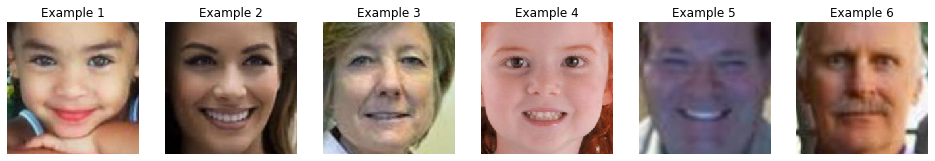

In [43]:
fig, axs = plt.subplots(1, 6)
fig.set_size_inches(16.5, 8.5)
for i in range(len(rand_images)):
    axs[i].imshow(images[rand_images[i]])
    axs[i].set_title('Example {}'.format(i + 1))
    axs[i].set_axis_off()
plt.show()
plt.close(fig)

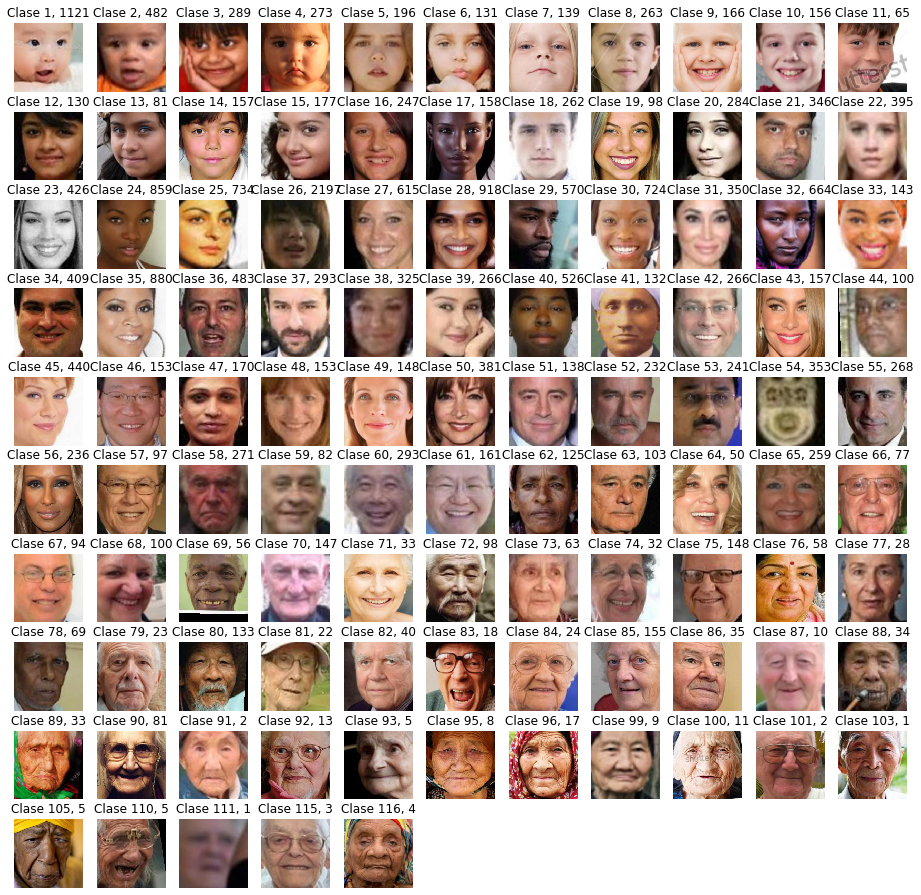

In [26]:
unique_labels = set(labels)
plt.figure(figsize=(16, 16))
i = 1
for label in unique_labels:
    temp_im = images[list(labels).index(label)]
    plt.subplot(10, 11, i)
    plt.axis('off')
    plt.title('Clase {}, {}'.format(label, list(labels).count(label)))
    i += 1
    plt.imshow(temp_im)
plt.show()